In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/data.csv')

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.isna().any().any()

True

In [5]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [7]:
data.drop('id', axis=1, inplace=True)

In [8]:
data.isna().any().any()

False

In [9]:
Y = data['diagnosis']
X = data.drop('diagnosis', axis=1)

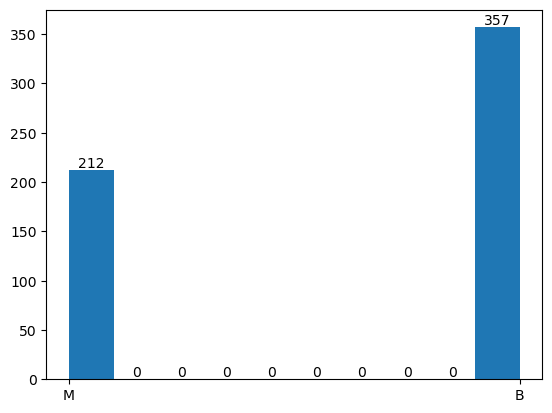

In [10]:
edges, lines, bins = plt.hist(Y)
plt.bar_label(bins)
plt.show()

In [11]:
Y.replace('B', 0, inplace=True)

In [12]:
Y.replace('M', 1, inplace=True)

<AxesSubplot:>

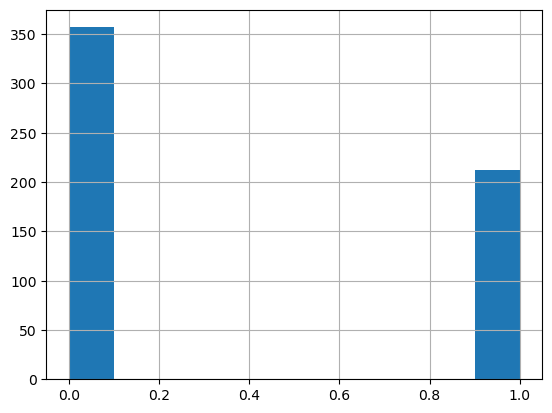

In [13]:
Y.hist()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

In [16]:
X_train.shape

(426, 30)

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
def report(model, x, y, text='train'):
    print(f'{text} \t | \t {type(model).__name__}')
    print('-'*50)
    y_pred = model.predict(x)
    print(classification_report(y, y_pred))
    print('-'*80)
    print (pd.DataFrame(confusion_matrix(y, y_pred), index=['B', 'M'], columns=['B', 'M']))

In [20]:
model = DecisionTreeClassifier()

In [21]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
report(model, X_train, y_train)

train 	 | 	 DecisionTreeClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

--------------------------------------------------------------------------------
     B    M
B  267    0
M    0  159


In [23]:
report(model, X_test, y_test, 'test')

test 	 | 	 DecisionTreeClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        90
           1       0.96      0.91      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

--------------------------------------------------------------------------------
    B   M
B  88   2
M   5  48


In [24]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [25]:
feature_names = X.columns
class_names = ['B', 'M']

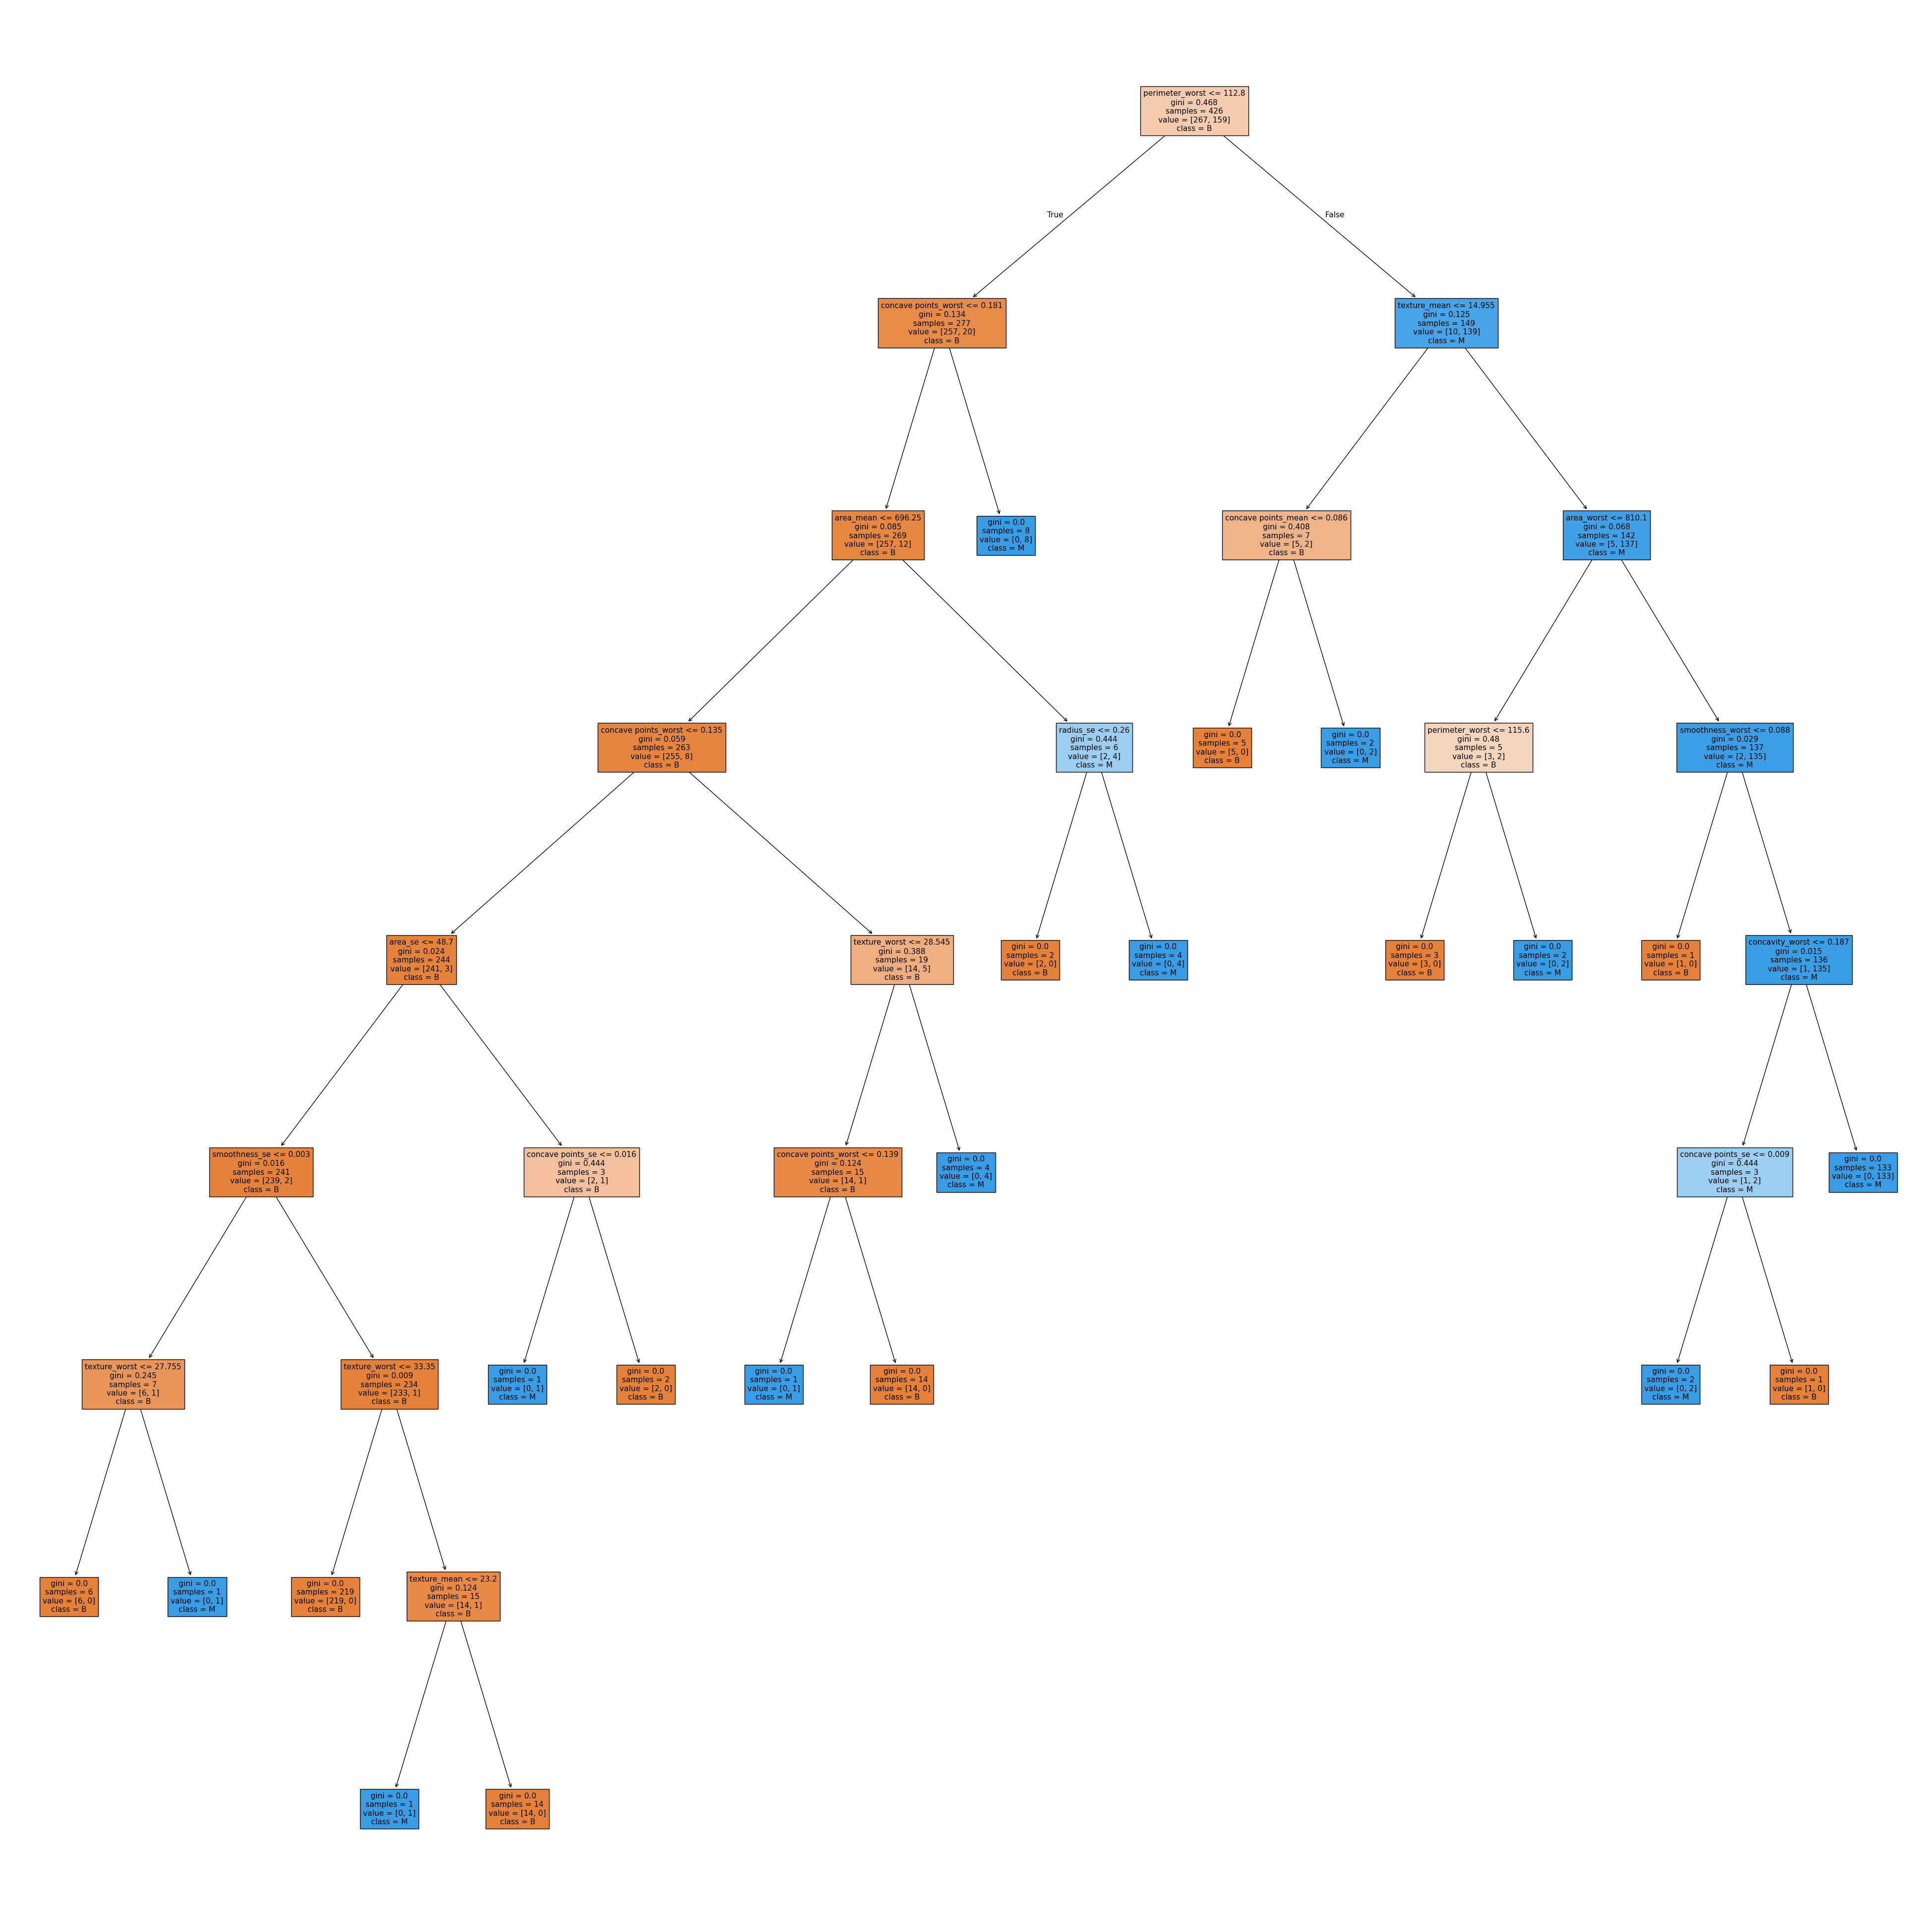

In [26]:
plt.figure(figsize=(50,50))
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [27]:
model = DecisionTreeClassifier(max_depth=5, min_samples_split=25, criterion='gini')

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=25)

In [29]:
report(model, X_train, y_train)

train 	 | 	 DecisionTreeClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       267
           1       0.98      0.92      0.95       159

    accuracy                           0.96       426
   macro avg       0.97      0.96      0.96       426
weighted avg       0.97      0.96      0.96       426

--------------------------------------------------------------------------------
     B    M
B  264    3
M   12  147


In [30]:
report(model, X_test, y_test, "test")

test 	 | 	 DecisionTreeClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        90
           1       0.95      0.74      0.83        53

    accuracy                           0.89       143
   macro avg       0.91      0.86      0.87       143
weighted avg       0.90      0.89      0.88       143

--------------------------------------------------------------------------------
    B   M
B  88   2
M  14  39


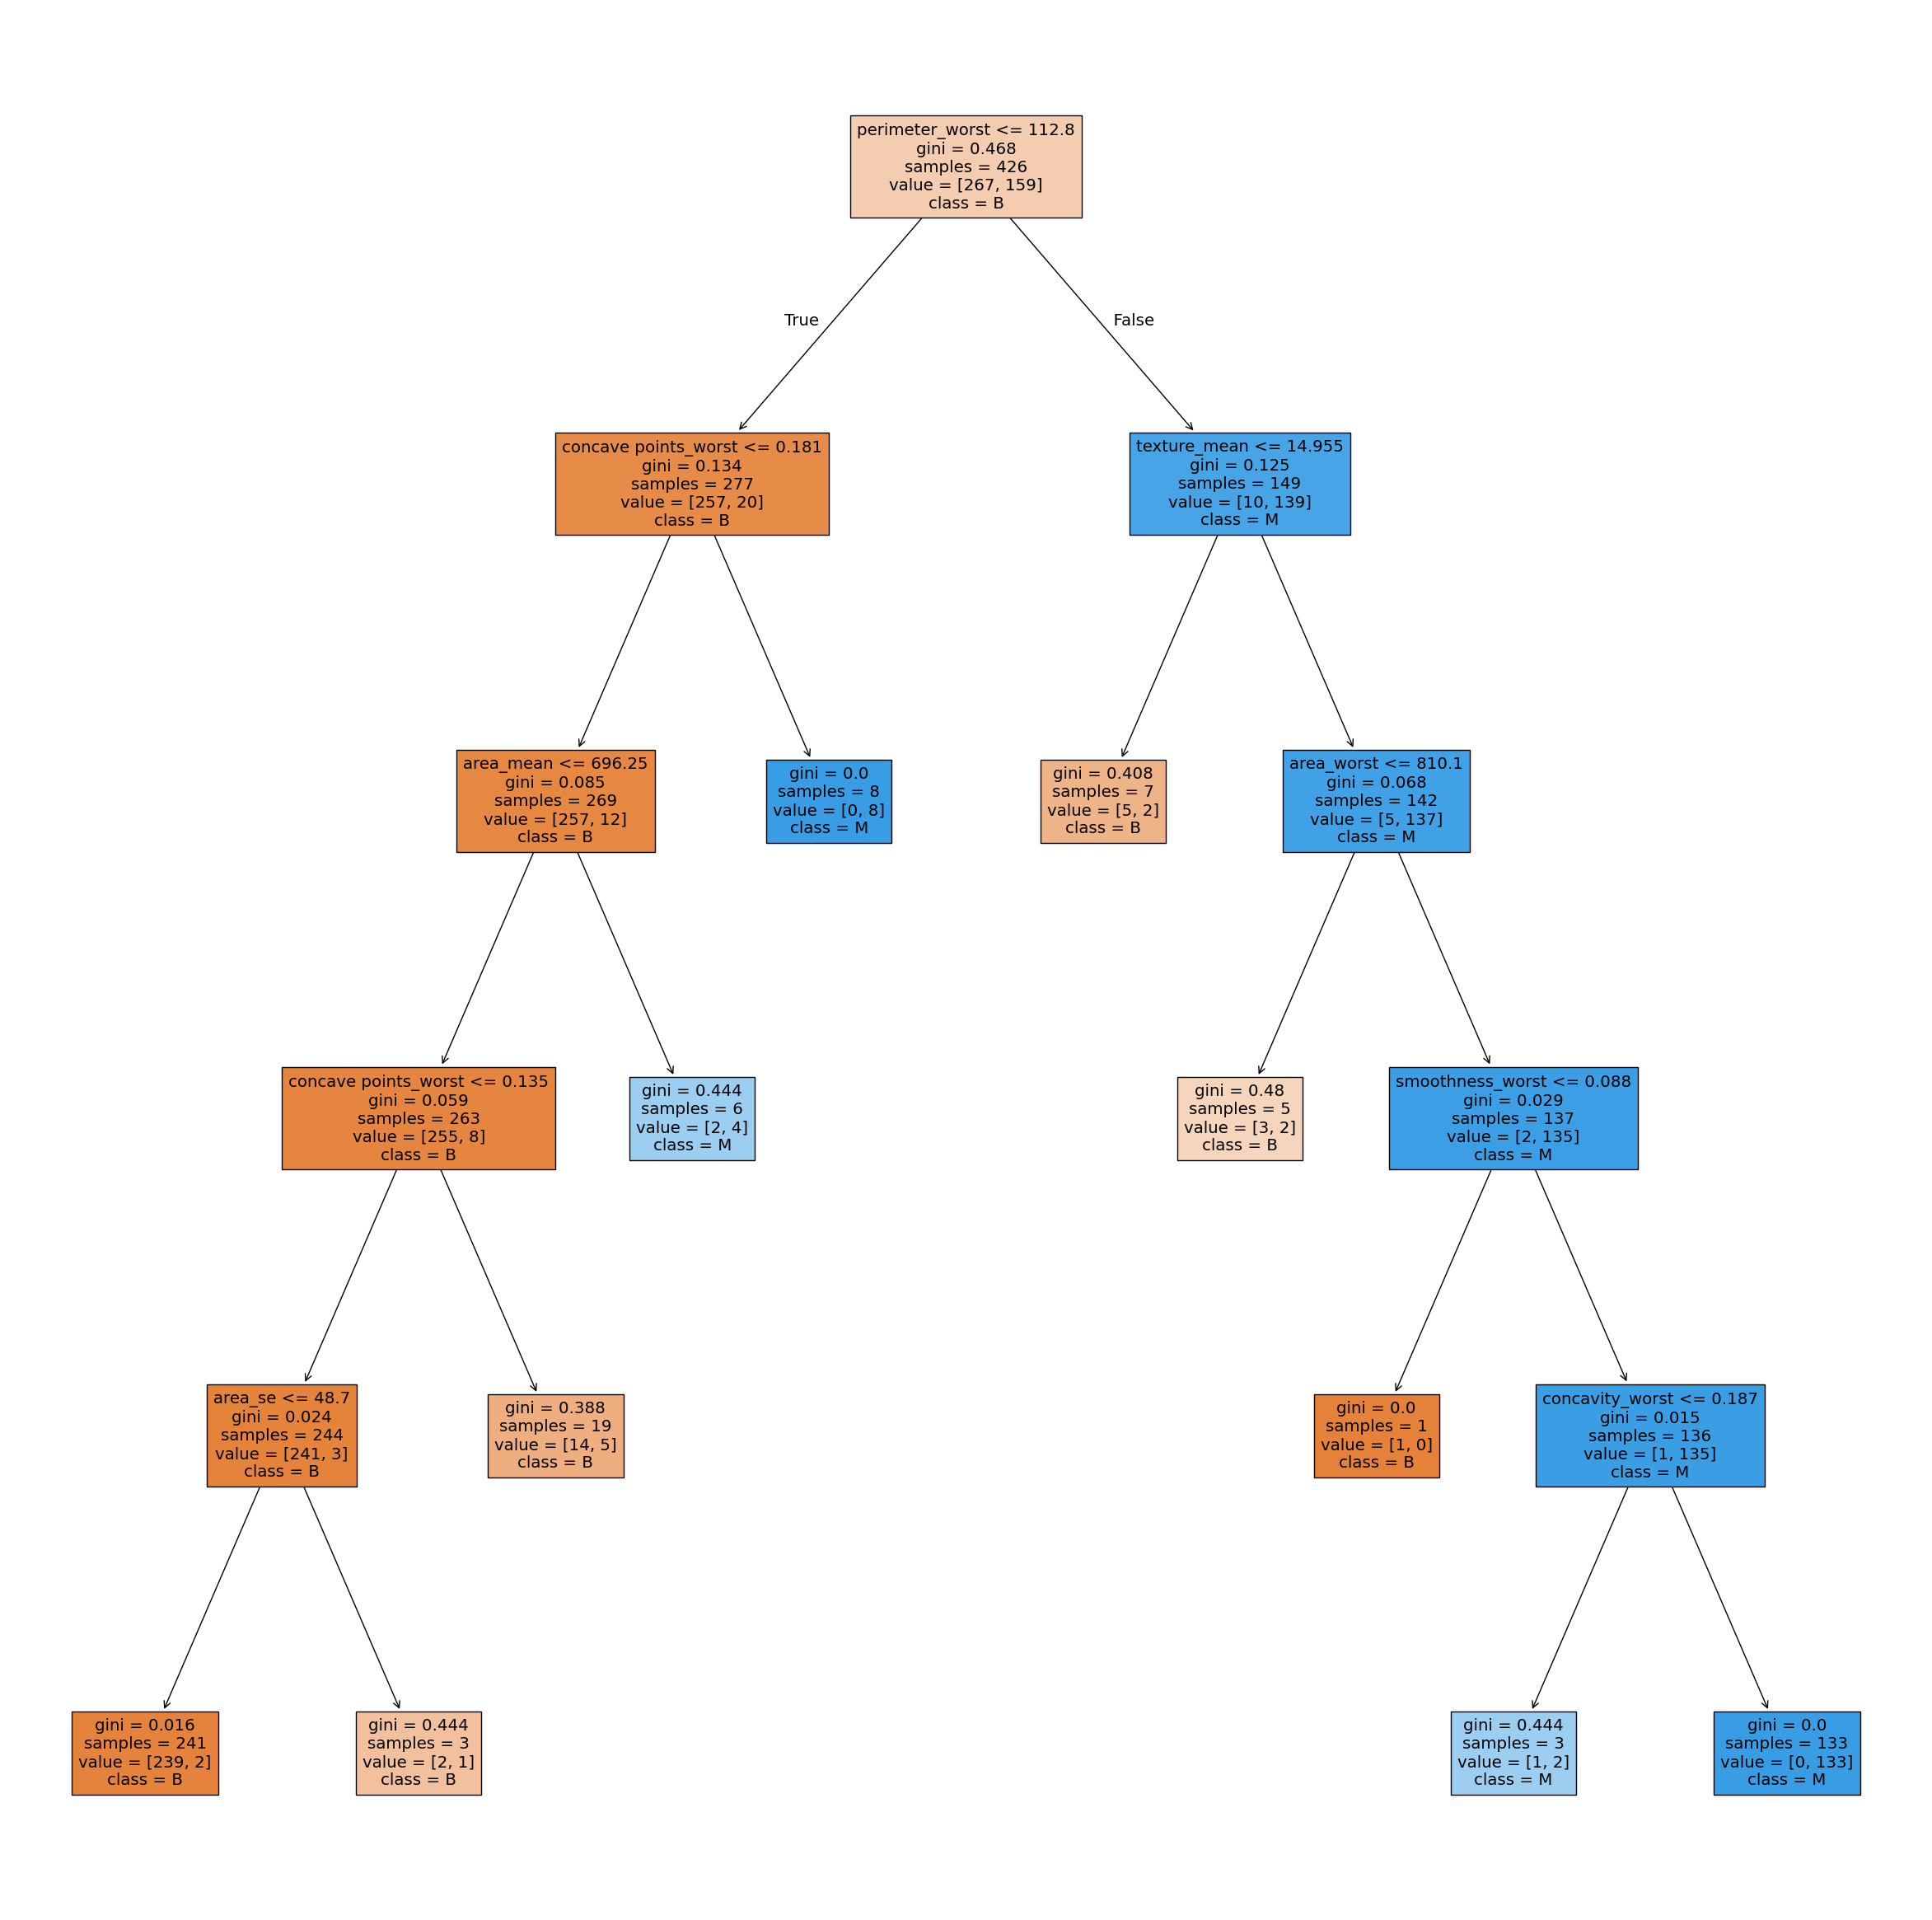

In [31]:
plt.figure(figsize=(30,30))
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8]
}

In [34]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, verbose=5)

In [35]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.907 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.953 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.918 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.906 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.859 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.919 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.953 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.906 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.929 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.882 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.919 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=6;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]},
             verbose=5)

In [36]:
estimator.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [37]:
model = estimator.best_estimator_

In [38]:
report(model, X_train, y_train)

train 	 | 	 DecisionTreeClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       267
           1       1.00      0.94      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426

--------------------------------------------------------------------------------
     B    M
B  267    0
M    9  150


In [39]:
report(model, X_test, y_test)

train 	 | 	 DecisionTreeClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        90
           1       0.96      0.81      0.88        53

    accuracy                           0.92       143
   macro avg       0.93      0.89      0.91       143
weighted avg       0.92      0.92      0.91       143

--------------------------------------------------------------------------------
    B   M
B  88   2
M  10  43


In [40]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [53]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,30, 2),
}

In [42]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, verbose=5)

In [43]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.907 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.953 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.918 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.906 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_split=5;, score=0.859 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_split=10;, score=0.907 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_split=10;, score=0.976 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_split=10;, score=0.918 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_split=10;, score=0.906 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_split=10;, score=0.859 t

[CV 3/5] END criterion=gini, max_depth=8, min_samples_split=20;, score=0.882 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_split=20;, score=0.918 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_split=20;, score=0.859 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_split=25;, score=0.907 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_split=25;, score=0.929 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_split=25;, score=0.894 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_split=25;, score=0.918 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_split=25;, score=0.859 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_split=5;, score=0.895 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_split=5;, score=0.988 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1

[CV 4/5] END criterion=gini, max_depth=16, min_samples_split=5;, score=0.918 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_split=5;, score=0.871 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_split=10;, score=0.907 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_split=10;, score=0.988 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_split=10;, score=0.882 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_split=10;, score=0.871 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_split=10;, score=0.882 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_split=15;, score=0.907 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_split=15;, score=0.976 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_split=15;, score=0.894 total time=   0.0s
[CV 4/5] END criterion=gini, max

[CV 2/5] END criterion=gini, max_depth=22, min_samples_split=20;, score=0.918 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=22, min_samples_split=20;, score=0.882 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=22, min_samples_split=20;, score=0.894 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=22, min_samples_split=20;, score=0.859 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=22, min_samples_split=25;, score=0.907 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=22, min_samples_split=25;, score=0.918 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=22, min_samples_split=25;, score=0.882 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=22, min_samples_split=25;, score=0.918 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=22, min_samples_split=25;, score=0.859 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=24, min_samples_split=5;, score=0.930 total time=   0.0s
[CV 2/5] END criterion=gini, ma

[CV 2/5] END criterion=entropy, max_depth=2, min_samples_split=10;, score=0.953 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_split=10;, score=0.894 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_split=10;, score=0.929 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_split=10;, score=0.859 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_split=15;, score=0.930 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_split=15;, score=0.953 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_split=15;, score=0.894 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_split=15;, score=0.929 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_split=15;, score=0.859 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_split=20;, score=0.930 total time=   0.0s
[CV 2/5] E

[CV 2/5] END criterion=entropy, max_depth=8, min_samples_split=20;, score=0.941 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_split=20;, score=0.906 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_split=20;, score=0.929 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_split=20;, score=0.859 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_split=25;, score=0.919 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_split=25;, score=0.941 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_split=25;, score=0.929 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_split=25;, score=0.929 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_split=25;, score=0.859 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_split=5;, score=0.919 total time=   0.0s
[CV 2/5] E

[CV 5/5] END criterion=entropy, max_depth=14, min_samples_split=25;, score=0.859 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_split=5;, score=0.919 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_split=5;, score=0.941 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_split=5;, score=0.941 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_split=5;, score=0.918 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_split=5;, score=0.894 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_split=10;, score=0.919 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_split=10;, score=0.929 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_split=10;, score=0.929 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_split=10;, score=0.918 total time=   0.0s
[CV 5

[CV 1/5] END criterion=entropy, max_depth=22, min_samples_split=20;, score=0.919 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=22, min_samples_split=20;, score=0.953 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=22, min_samples_split=20;, score=0.906 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=22, min_samples_split=20;, score=0.929 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=22, min_samples_split=20;, score=0.859 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=22, min_samples_split=25;, score=0.919 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=22, min_samples_split=25;, score=0.941 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=22, min_samples_split=25;, score=0.929 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=22, min_samples_split=25;, score=0.929 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=22, min_samples_split=25;, score=0.859 total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 30, 2),
                         'min_samples_split': range(5, 30, 5)},
             verbose=5)

In [44]:
estimator.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_split=5)

In [45]:
report(estimator.best_estimator_, X_train, y_train)

train 	 | 	 DecisionTreeClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       0.99      0.99      0.99       159

    accuracy                           1.00       426
   macro avg       0.99      0.99      0.99       426
weighted avg       1.00      1.00      1.00       426

--------------------------------------------------------------------------------
     B    M
B  266    1
M    1  158


In [46]:
report(estimator.best_estimator_, X_test, y_test, 'test')

test 	 | 	 DecisionTreeClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        90
           1       0.96      0.87      0.91        53

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143

--------------------------------------------------------------------------------
    B   M
B  88   2
M   7  46


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model = RandomForestClassifier(criterion='gini', max_depth=4)

In [49]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [50]:
report(model, X_train, y_train)

train 	 | 	 RandomForestClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       267
           1       1.00      0.96      0.98       159

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.98       426
weighted avg       0.99      0.99      0.99       426

--------------------------------------------------------------------------------
     B    M
B  267    0
M    6  153


In [51]:
report(model, X_test, y_test, 'test')

test 	 | 	 RandomForestClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        90
           1       1.00      0.89      0.94        53

    accuracy                           0.96       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143

--------------------------------------------------------------------------------
    B   M
B  90   0
M   6  47


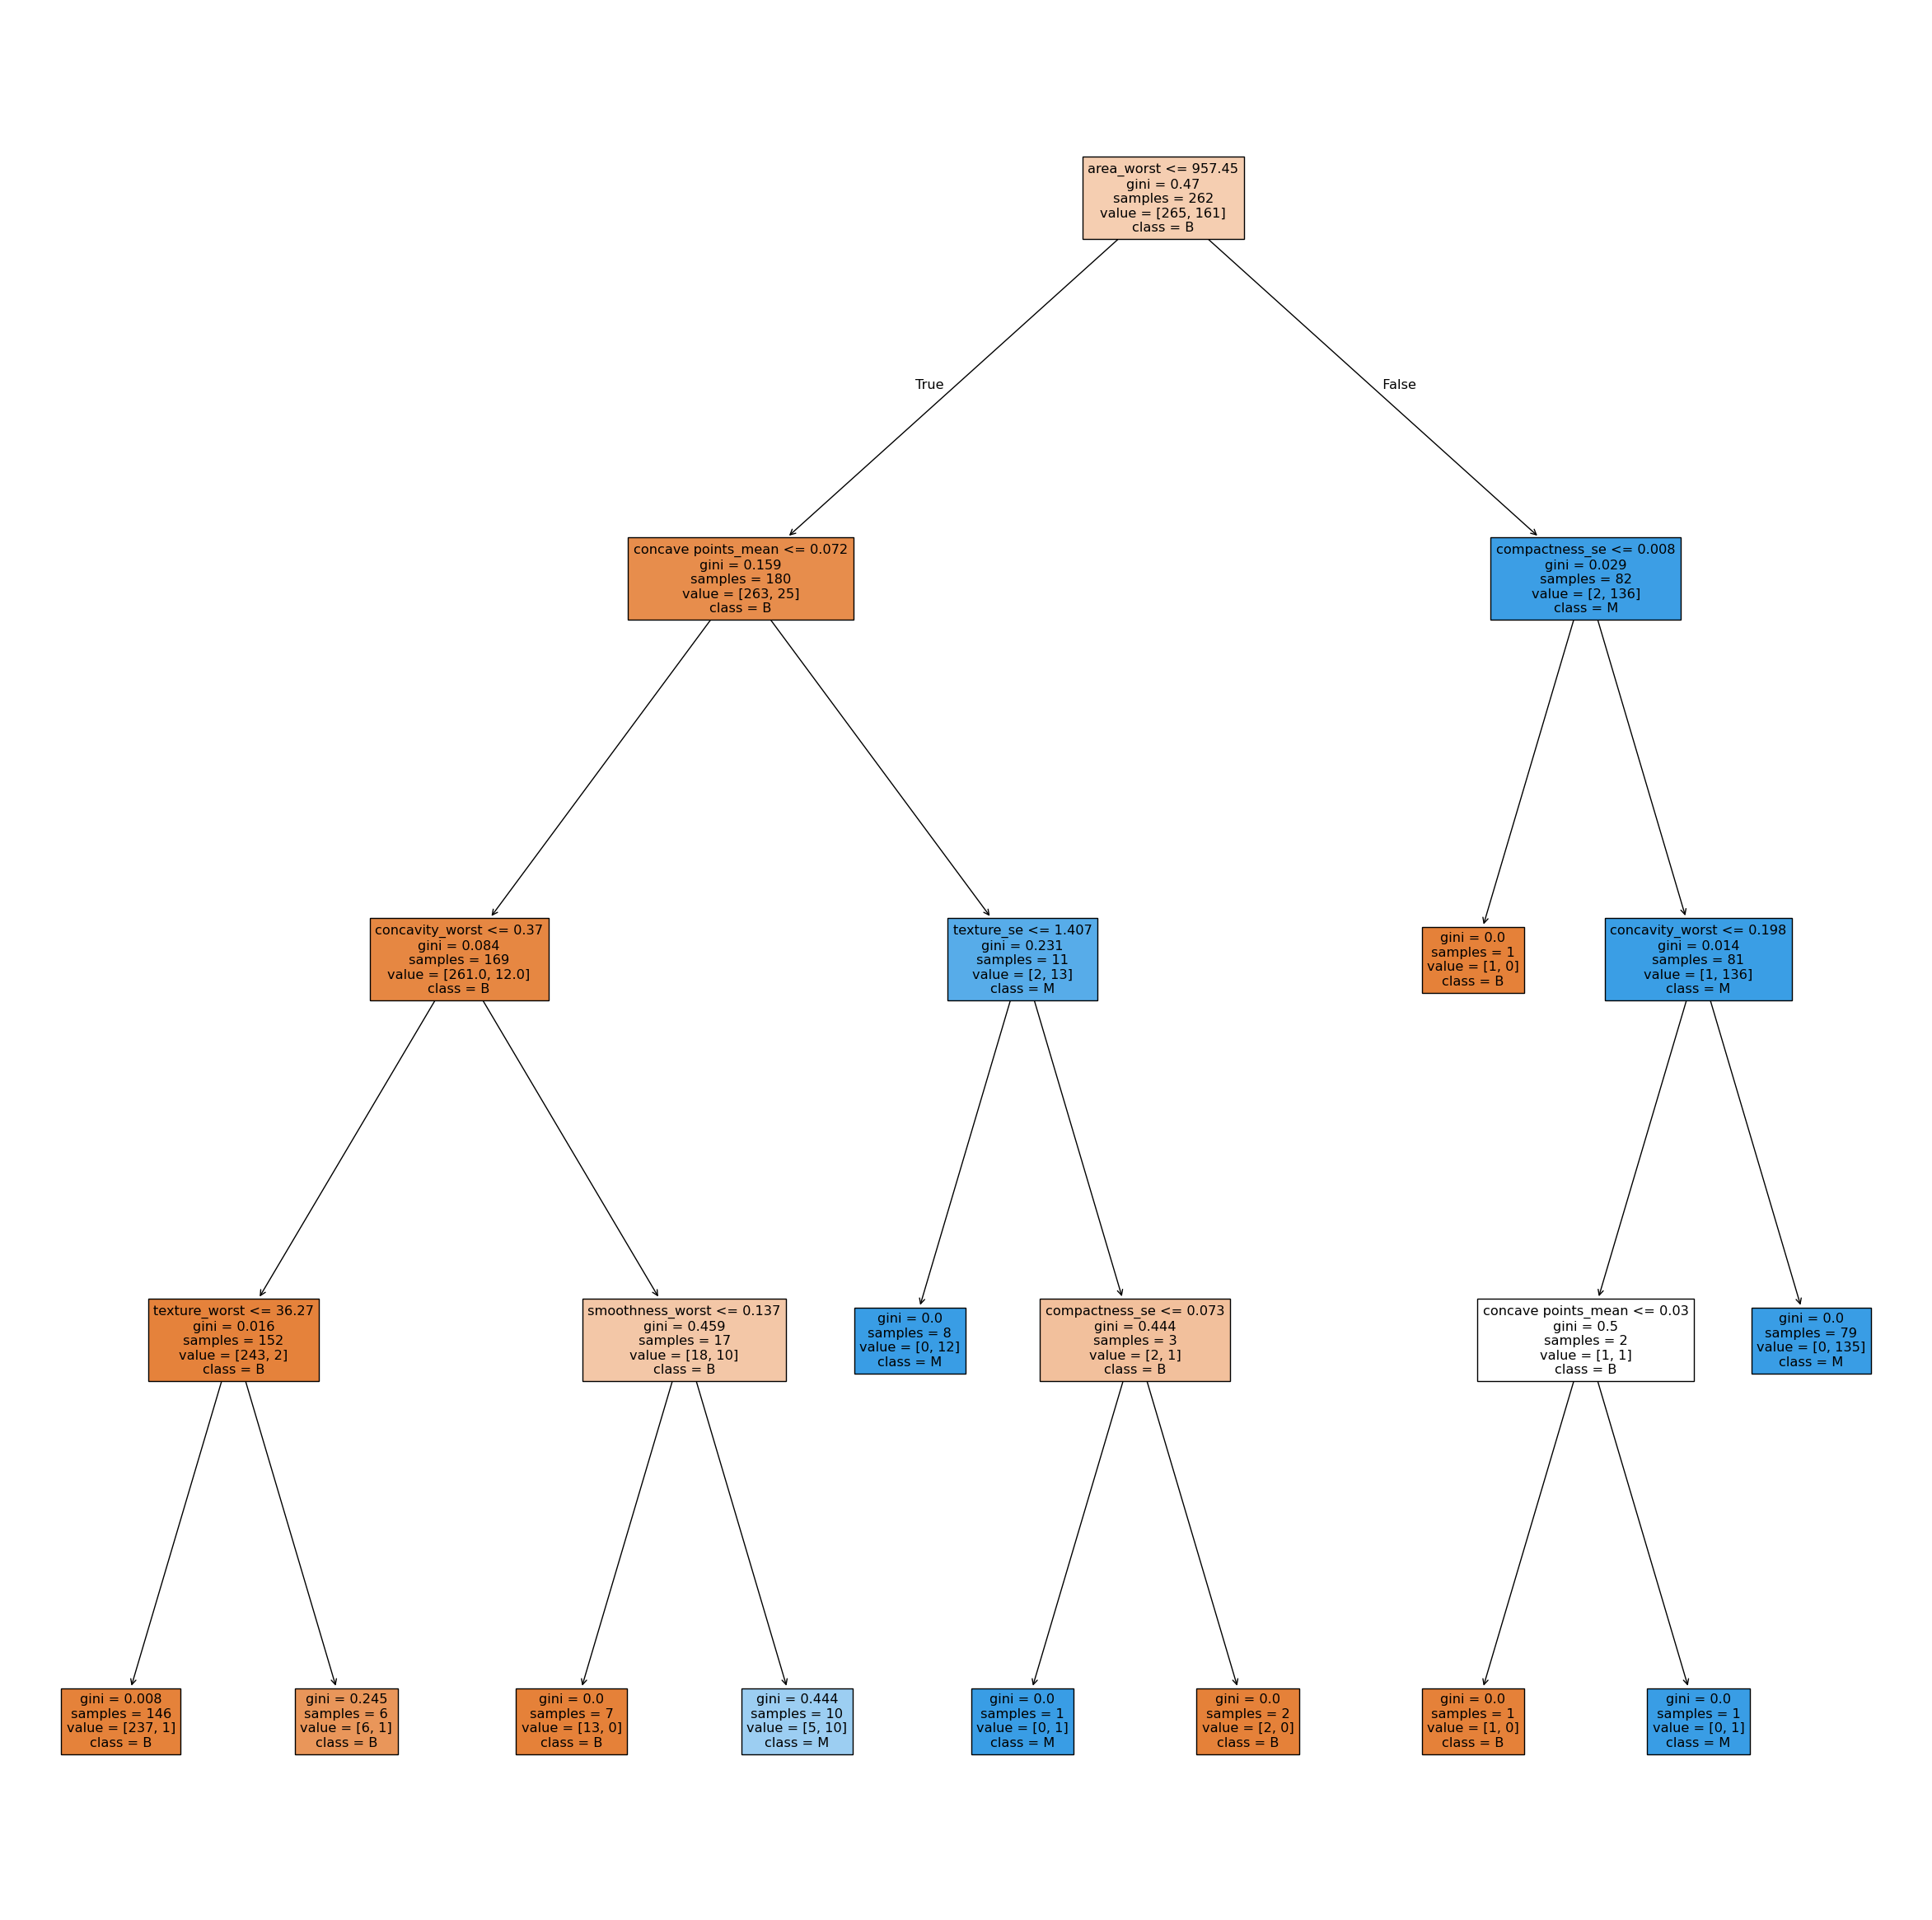

In [52]:
plt.figure(figsize=(30,30))
plot_tree(model.estimators_[0], feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [54]:
estimator = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5, verbose=5)

In [55]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.953 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.965 total time=   0.1s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.941 total time=   0.1s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.965 total time=   0.1s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.941 total time=   0.1s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.977 total time=   0.1s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.976 total time=   0.1s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.941 total time=   0.1s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.976 total time=   0.1s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.941 total time=   0.1s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.977 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=6

[CV 2/5] END ...criterion=entropy, max_depth=14;, score=0.965 total time=   0.1s
[CV 3/5] END ...criterion=entropy, max_depth=14;, score=0.941 total time=   0.1s
[CV 4/5] END ...criterion=entropy, max_depth=14;, score=0.965 total time=   0.1s
[CV 5/5] END ...criterion=entropy, max_depth=14;, score=0.929 total time=   0.1s
[CV 1/5] END ...criterion=entropy, max_depth=16;, score=0.977 total time=   0.1s
[CV 2/5] END ...criterion=entropy, max_depth=16;, score=0.976 total time=   0.1s
[CV 3/5] END ...criterion=entropy, max_depth=16;, score=0.941 total time=   0.1s
[CV 4/5] END ...criterion=entropy, max_depth=16;, score=0.976 total time=   0.1s
[CV 5/5] END ...criterion=entropy, max_depth=16;, score=0.953 total time=   0.1s
[CV 1/5] END ...criterion=entropy, max_depth=18;, score=0.965 total time=   0.1s
[CV 2/5] END ...criterion=entropy, max_depth=18;, score=0.976 total time=   0.1s
[CV 3/5] END ...criterion=entropy, max_depth=18;, score=0.941 total time=   0.1s
[CV 4/5] END ...criterion=en

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 30, 2)},
             verbose=5)

In [56]:
estimator.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=16)

In [57]:
report(estimator.best_estimator_, X_train, y_train)

train 	 | 	 RandomForestClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

--------------------------------------------------------------------------------
     B    M
B  267    0
M    0  159


In [58]:
report(estimator.best_estimator_, X_test, y_test, 'test')

test 	 | 	 RandomForestClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

--------------------------------------------------------------------------------
    B   M
B  90   0
M   3  50


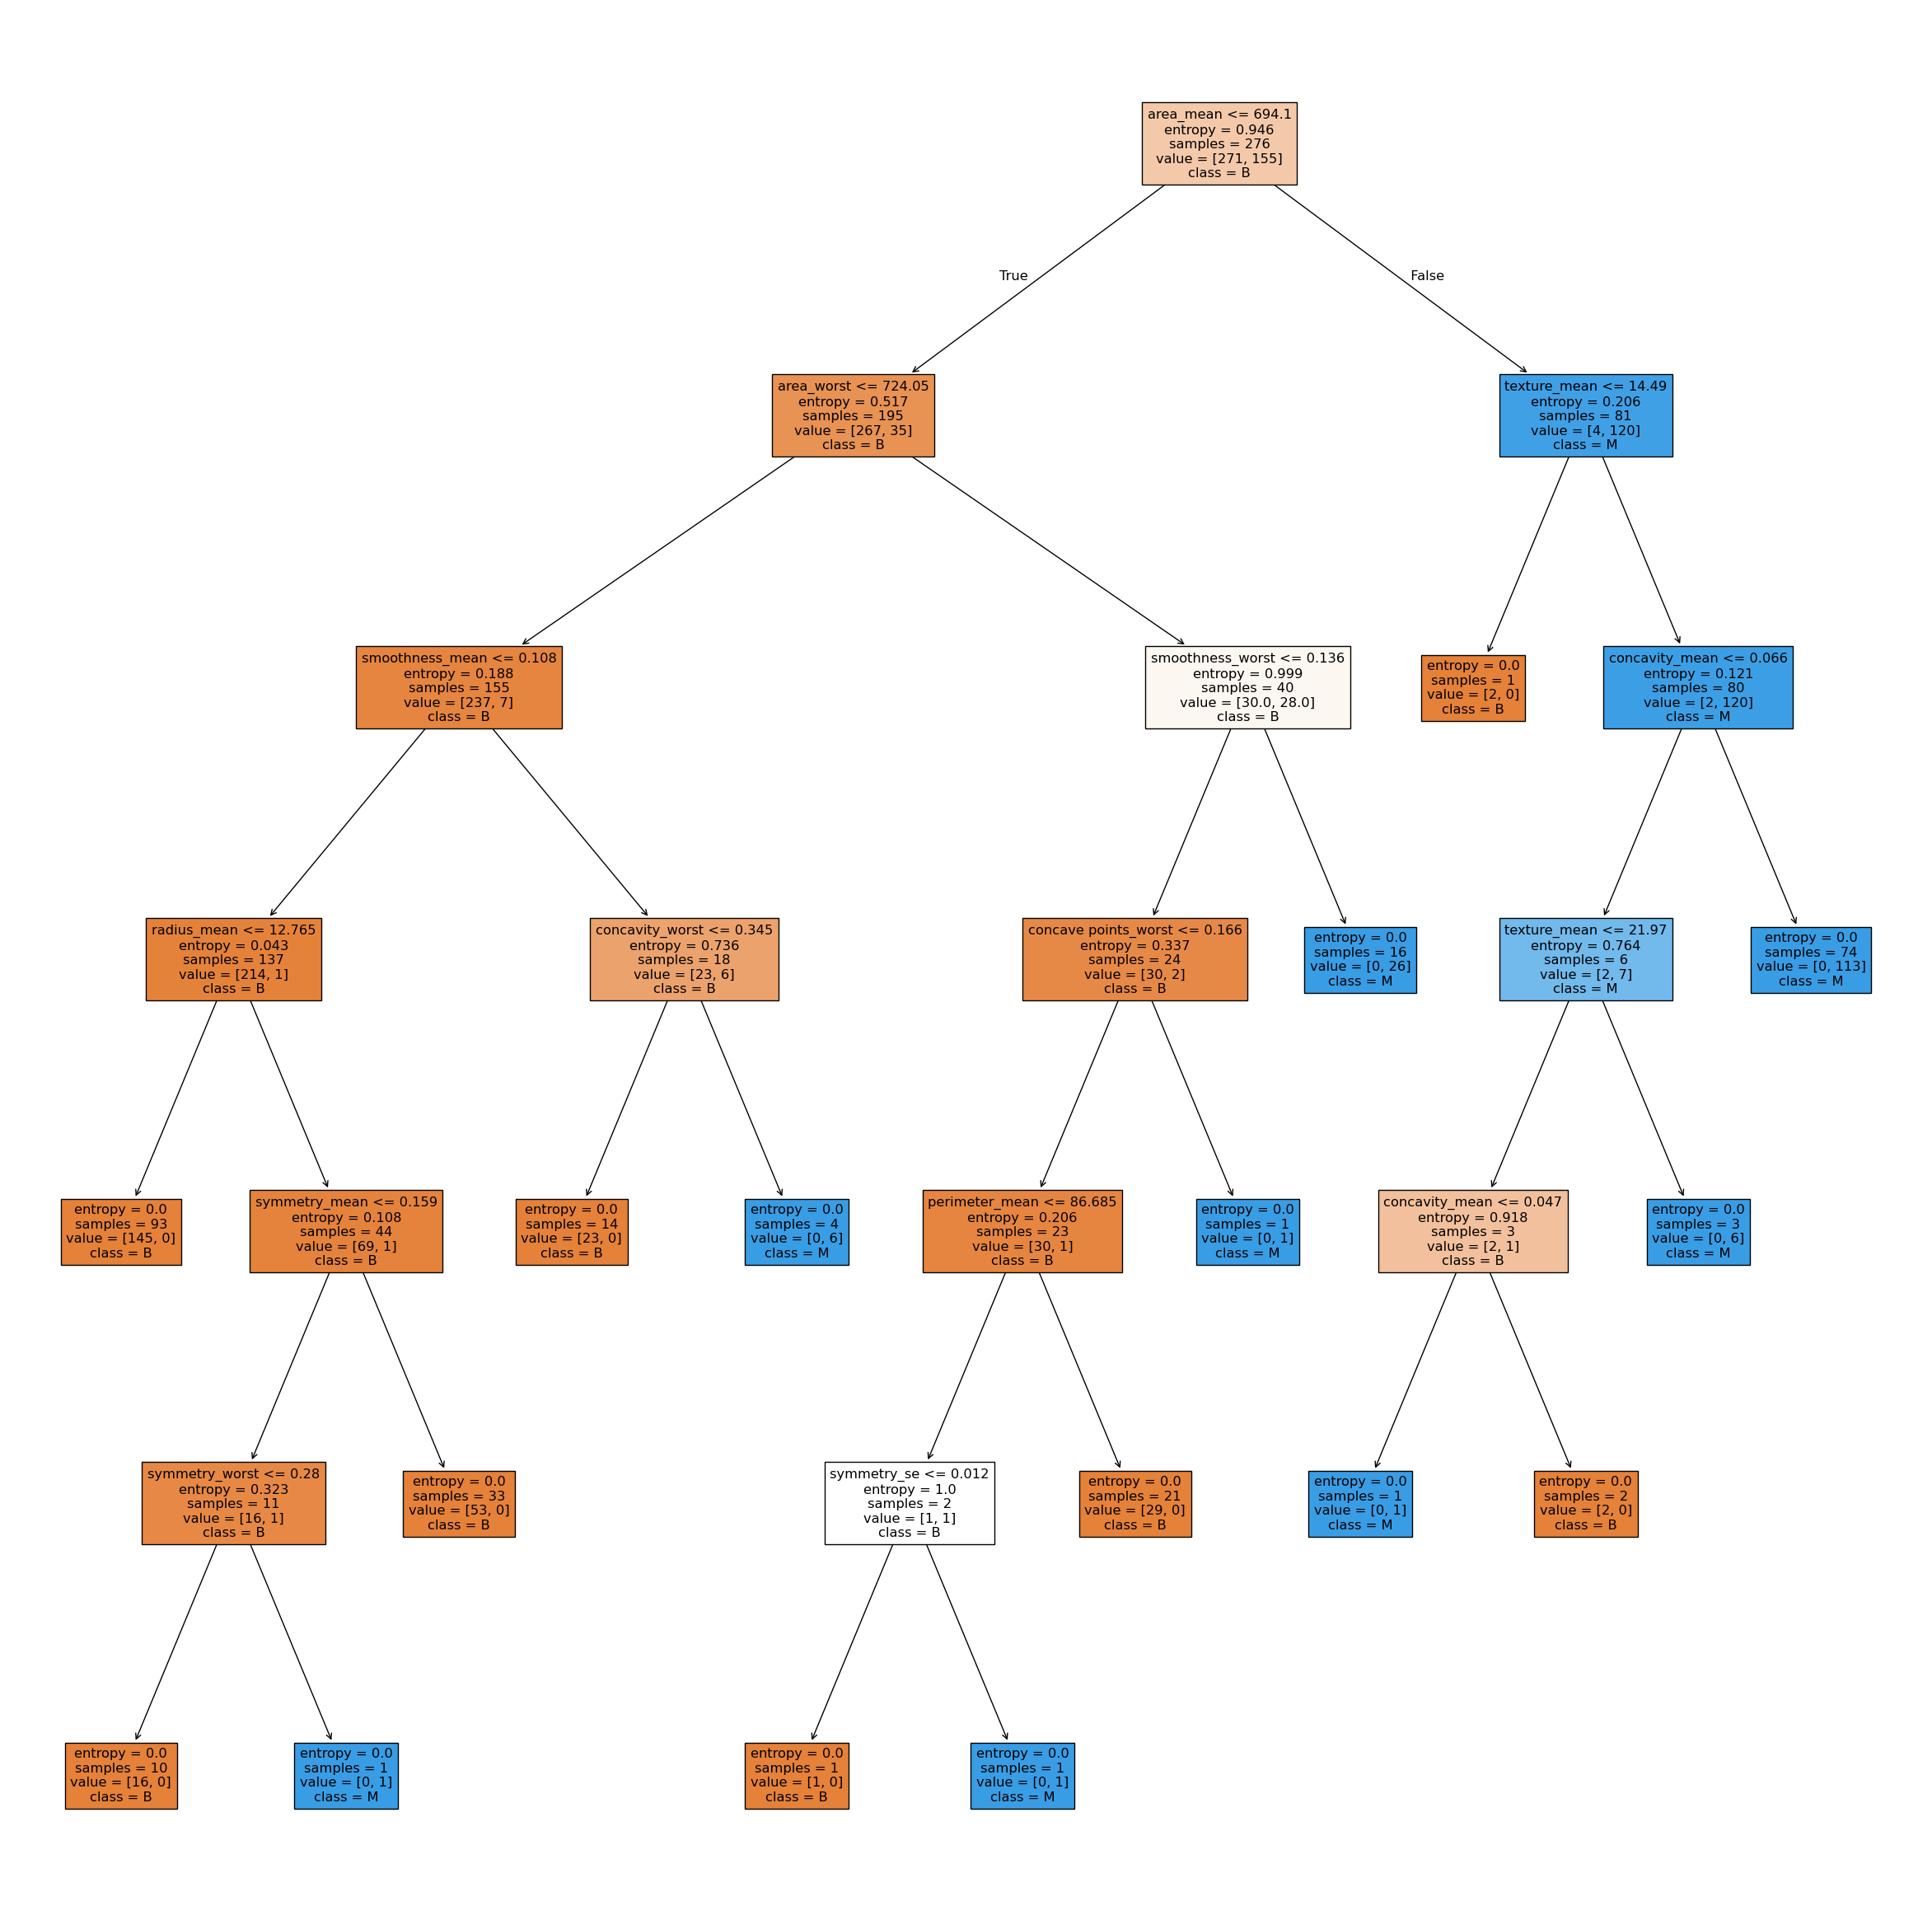

In [59]:
plt.figure(figsize=(30,30))
plot_tree(estimator.best_estimator_.estimators_[0], class_names=class_names, feature_names=feature_names, filled=True)
plt.show()